<a href="https://colab.research.google.com/github/Ad163/rideHailing/blob/main/rideHailing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.

Please analyze the dataset to identify top opportunities for reducing the number of overcharge tickets and present your results. Please provide us with a PDF file/document with the findings. Finally, you shouldn’t spend more than 8 hours on this analysis.

 Variables in the file:

order_id_new, order_try_id_new - id of an order

calc_created- time when the order was created

metered_price, distance, duration- actual price, distance and duration of a ride

upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

distance - ride distance

duration - ride duration

gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)

entered_by- who entered the address

b_state- state of a ride (finished implies that the ride was actually done)

dest_change_number- number of destination changes by a rider

predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

prediction_price_type- internal variable for the type of prediction:

upfront, prediction - prediction happened before the ride

upfront_destination_changed - prediction happened after rider changed destination during the ride

change_reason_pricing - records due to whose action the price changed

ticket_id_new - id for customer support ticket

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('test.csv')

In [ ]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,...,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,...,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [ ]:
df['overpaid_ride_ticket'].value_counts()

overpaid_ride_ticket
0    4606
1     337
Name: count, dtype: int64

In [ ]:
len(df)

4943

In [ ]:
# 2020-02-02 3:37:31

In [ ]:
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['calc_created'].agg(['min','max'])

min   2020-02-02 00:01:16
max   2020-03-13 23:52:07
Name: calc_created, dtype: datetime64[ns]

In [ ]:
df.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
change_reason_pricing    0.939713
ticket_id_new            0.000000
device_token             1.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

In [ ]:
# !pip install catboost

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
# df['dt_unix'] = (df['calc_created'].astype(int)) / 10**9
df['dt_unix'] = df['calc_created'].astype(np.int64) / 10**9

In [ ]:
df = df[(~df['prediction_price_type'].isna())&(~df['rider_app_version'].isna())].copy()

In [ ]:
train = df.sample(frac=0.7,random_state=42).copy()

In [ ]:
val = df[~df.index.isin(train.index)].copy()

In [ ]:
len(train)

3446

In [ ]:
len(val)

1477

In [ ]:
len(train) + len(val)

4923

In [ ]:
len(df)

4923

In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'dt_unix'],
      dtype='object')

In [ ]:
df.select_dtypes(include='object').columns

Index(['entered_by', 'b_state', 'prediction_price_type',
       'change_reason_pricing', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name'],
      dtype='object')

In [ ]:
X_col = ['order_id_new', 'order_try_id_new', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'fraud_score',
       'dt_unix']
y_col = ['overpaid_ride_ticket']
cat_features = ['entered_by', 'b_state', 'prediction_price_type',
        'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'device_name']

In [ ]:
model = CatBoostClassifier(learning_rate=0.005,
                           eval_metric='AUC',
                           cat_features=cat_features,verbose=100)

In [ ]:
model.fit(train[X_col],train[y_col],
          eval_set=(val[X_col],val[y_col]))

0:	test: 0.8134606	best: 0.8134606 (0)	total: 61.6ms	remaining: 1m 1s
100:	test: 0.8488624	best: 0.8488912 (93)	total: 883ms	remaining: 7.86s
200:	test: 0.8575905	best: 0.8575905 (200)	total: 1.69s	remaining: 6.73s
300:	test: 0.8634117	best: 0.8634261 (298)	total: 2.7s	remaining: 6.28s
400:	test: 0.8649407	best: 0.8654732 (378)	total: 3.65s	remaining: 5.46s
500:	test: 0.8648040	best: 0.8655811 (458)	total: 4.65s	remaining: 4.63s
600:	test: 0.8648616	best: 0.8655811 (458)	total: 5.79s	remaining: 3.84s
700:	test: 0.8644010	best: 0.8655811 (458)	total: 7.79s	remaining: 3.32s
800:	test: 0.8645593	best: 0.8655811 (458)	total: 8.96s	remaining: 2.23s
900:	test: 0.8644694	best: 0.8655811 (458)	total: 9.96s	remaining: 1.09s
999:	test: 0.8648220	best: 0.8655811 (458)	total: 11s	remaining: 0us

bestTest = 0.8655811075
bestIteration = 458

Shrink model to first 459 iterations.


In [ ]:
model.predict_proba(val[X_col])

array([[0.98332747, 0.01667253],
       [0.83311298, 0.16688702],
       [0.93356112, 0.06643888],
       ...,
       [0.97939398, 0.02060602],
       [0.94535743, 0.05464257],
       [0.97954159, 0.02045841]])

In [ ]:
fi = pd.DataFrame({'feature':X_col,'fi':model.feature_importances_})

In [ ]:
fi.sort_values('fi',ascending=False)

,feature,fi
2,metered_price,13.985340
10,prediction_price_type,12.379858
21,eu_indicator,12.107867
22,fraud_score,8.901335
6,gps_confidence,7.448661
20,device_name,6.554602
5,duration,5.469510
3,upfront_price,5.262882
18,driver_app_version,4.596941
4,distance,4.086869


<Axes: xlabel='feature'>

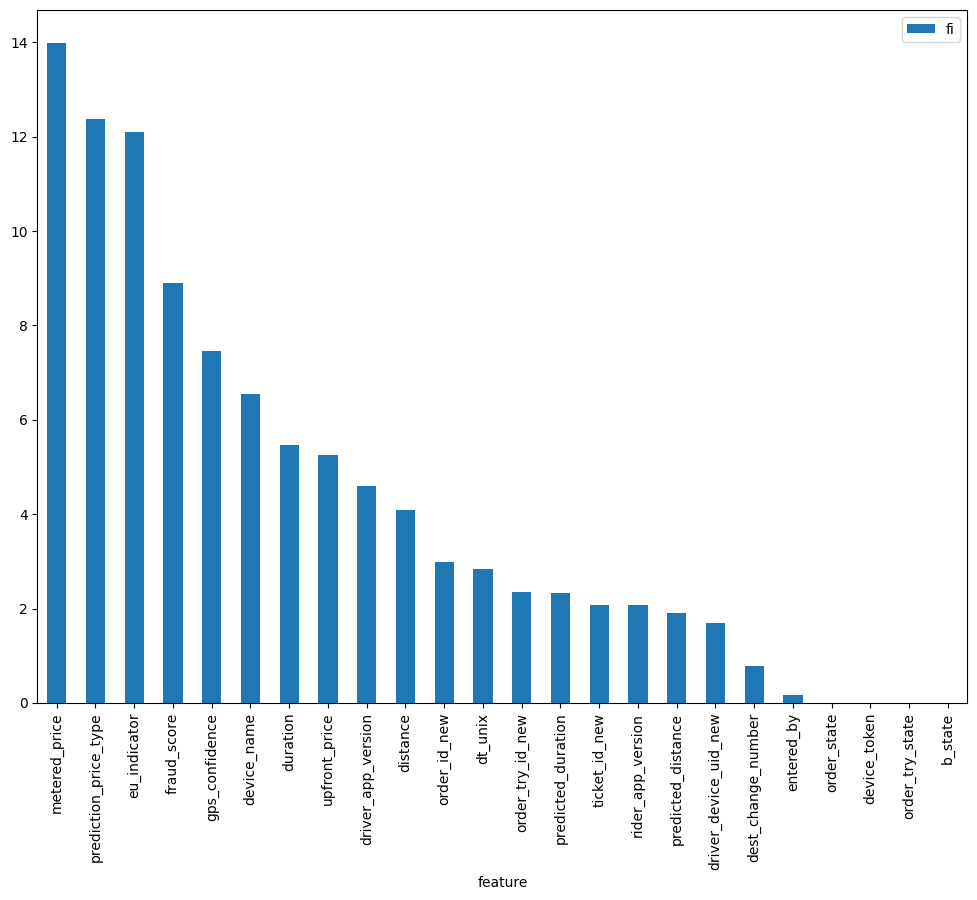

In [ ]:
fi.sort_values('fi',ascending=False).set_index('feature').plot(kind='bar',figsize=(12,9))

In [ ]:
df = pd.read_csv('test.csv')
df['calc_created'] = pd.to_datetime(df['calc_created'],format='%Y-%m-%d %H:%M:%S')

In [ ]:
df['metered_price']

0           4.04
1           6.09
2           4.32
3       72871.72
4       20032.50
          ...   
4938       10.89
4939     8789.28
4940        7.50
4941        3.06
4942    29244.10
Name: metered_price, Length: 4943, dtype: float64

Axes(0.125,0.11;0.775x0.77)


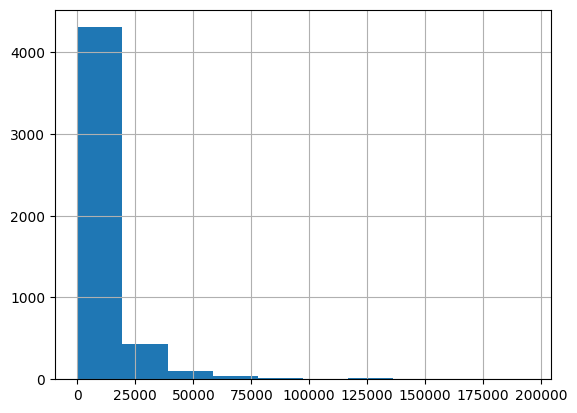

In [ ]:
print(df['metered_price'].hist())

In [ ]:
df['metered_price_bin'] = pd.qcut(df['metered_price'],5)

In [ ]:
df['overpaid_ride_ticket']

0       0
1       0
2       0
3       1
4       0
       ..
4938    0
4939    0
4940    0
4941    0
4942    0
Name: overpaid_ride_ticket, Length: 4943, dtype: int64

In [ ]:
df.groupby('metered_price_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
metered_price_bin,,
"(1.999, 4.72]",992,0.000000
"(4.72, 8.25]",978,0.005112
"(8.25, 6000.0]",1291,0.040279
"(6000.0, 13835.1]",677,0.138848
"(13835.1, 194483.52]",985,0.188832


In [ ]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score',
       'metered_price_bin'],
      dtype='object')

In [ ]:
df.groupby('prediction_price_type')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
prediction_price_type,,
prediction,1279,0.173573
upfront,3432,0.032634
upfront_destination_changed,208,0.014423
upfront_waypoint_changed,4,0.000000


In [ ]:
df['eu_indicator']

0       1
1       1
2       1
3       0
4       0
       ..
4938    1
4939    0
4940    1
4941    1
4942    0
Name: eu_indicator, Length: 4943, dtype: int64

In [ ]:
df.groupby('eu_indicator')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
eu_indicator,,
0,2173,0.149103
1,2770,0.004693


In [ ]:
df['fraud_score'].isna().mean()

0.5581630588711309

In [ ]:
df['fraud_score'] = df['fraud_score'].fillna(-9999)

In [ ]:
df['fraud_bin'] = pd.qcut(df['fraud_score'],5,duplicates='drop')

In [ ]:
df.groupby('fraud_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
fraud_bin,,
"(-14225.001, -9999.0]",2764,0.115774
"(-9999.0, -1850.0]",203,0.014778
"(-1850.0, -228.0]",988,0.007085
"(-228.0, 49.0]",988,0.007085


In [ ]:
df['gps_confidence']

0       1
1       1
2       1
3       0
4       1
       ..
4938    1
4939    0
4940    1
4941    1
4942    1
Name: gps_confidence, Length: 4943, dtype: int64

In [ ]:
df.groupby('gps_confidence')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
gps_confidence,,
0,985,0.204061
1,3958,0.034361


In [ ]:
df['device_name']

0          Xiaomi Redmi 6
1        Samsung SM-G965F
2        Samsung SM-A530F
3                TECNO-Y6
4              Itel W5504
              ...        
4938       HUAWEI LYA-L29
4939     Samsung SM-G928F
4940       HUAWEI AMN-LX9
4941    TP-Link Neffos X1
4942     Samsung SM-A260F
Name: device_name, Length: 4943, dtype: object

In [ ]:
t = df.groupby('device_name')['overpaid_ride_ticket'].agg(['count','mean'])

In [ ]:
t

,count,mean
device_name,,
Alps F9 Pro,10,0.000000
Alps NODROPOUT T25,1,0.000000
Alps TECNO B1p,1,0.000000
Asus ASUS_A002,5,0.000000
Asus ASUS_X00TD,3,0.000000
...,...,...
"iPhone8,1",91,0.010989
"iPhone8,2",18,0.000000
"iPhone8,4",35,0.000000


In [ ]:
t.sort_values('mean',ascending=False)

,count,mean
device_name,,
TECNO-C7,1,1.0
Samsung GT-N7100,2,1.0
HTC U Ultra,1,1.0
TECNO-Y6,1,1.0
HTC One X10,1,1.0
...,...,...
LGE LG-K350,3,0.0
LGE LG-H990,1,0.0
LGE LG-H815,2,0.0


In [ ]:
def device_cat(device_name):
  if 'tecno' in device_name.lower():
    return 'tecno'
  if 'iphone' in device_name.lower():
    return 'iphone'
  if 'lg' in device_name.lower():
    return 'lg'
  if 'samsung' in device_name.lower():
    return 'samsung'
  if 'htc' in device_name.lower():
    return 'htc'
  if 'nokia' in device_name.lower():
    return 'nokia'
  if 'xiaomi'in device_name.lower():
    return 'xiaomi'
  if 'HUAWEI'.lower() in device_name.lower():
    return 'HUAWEI'.lower()
  return 'misc'

In [ ]:
df['device_group'] = df['device_name'].apply(device_cat)

In [ ]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
device_group,,
htc,16,0.312500
huawei,724,0.019337
iphone,426,0.021127
lg,39,0.000000
misc,703,0.095306
nokia,158,0.113924
samsung,1683,0.038622
tecno,933,0.167203
xiaomi,261,0.011494


In [ ]:
df.groupby('device_group')['overpaid_ride_ticket'].agg(['count','mean']).sort_values('mean',ascending=False)

,count,mean
device_group,,
htc,16,0.312500
tecno,933,0.167203
nokia,158,0.113924
misc,703,0.095306
samsung,1683,0.038622
iphone,426,0.021127
huawei,724,0.019337
xiaomi,261,0.011494
lg,39,0.000000


In [ ]:
df[df['device_group'] == 'misc']['device_name'].value_counts()

device_name
Itel S12                                  50
Infinix X572                              33
INFINIX MOBILITY LIMITED Infinix X650B    32
HMD Global TA-1032                        27
INFINIX MOBILITY LIMITED Infinix X624B    25
                                          ..
Motorola Moto G (5)                        1
ZTE BLADE A506                             1
Asus ASUS_Z012D                            1
Sony E5663                                 1
Lava LAVA_R1                               1
Name: count, Length: 141, dtype: int64

In [ ]:
df['dur_bin'] = pd.qcut(df['duration'],5)

In [ ]:
df.groupby('dur_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
dur_bin,,
"(-0.001, 517.0]",992,0.033266
"(517.0, 863.0]",987,0.030395
"(863.0, 1304.0]",988,0.051619
"(1304.0, 2241.2]",987,0.105370
"(2241.2, 22402.0]",989,0.120324


In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [ ]:
# !pip install shap

In [ ]:
#!pip install XGBoost

In [ ]:
import xgboost
# !pip install shap
import shap

# load JS visualization code to notebook
shap.initjs()

# train XGBoost model

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train[X_col])

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], train[X_col].iloc[0,:])

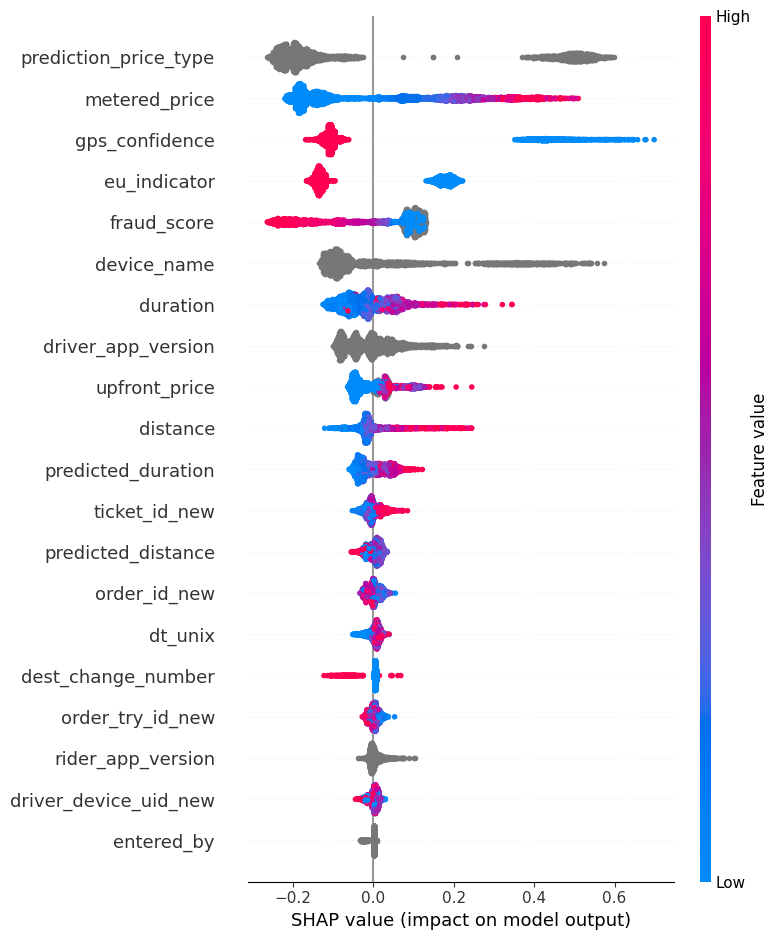

In [ ]:
shap.summary_plot(shap_values, train[X_col])


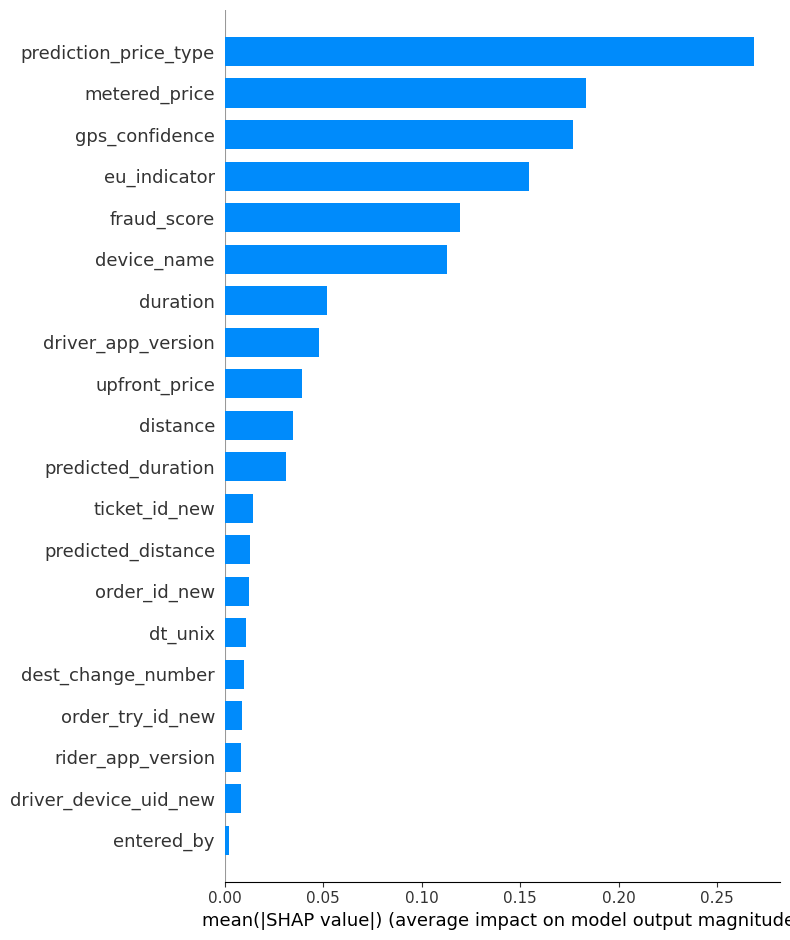

In [ ]:
shap.summary_plot(shap_values, train[X_col], plot_type="bar")


In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score,metered_price_bin,fraud_bin,device_group,dur_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,DA.4.39,1578,Samsung SM-G965F,1,0,-9999.0,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,DA.4.37,951,Samsung SM-A530F,1,0,-166.0,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,DA.4.37,1587,TECNO-Y6,0,1,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,DA.4.37,433,Itel W5504,0,0,-9999.0,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,DA.4.37,1612,HUAWEI LYA-L29,1,0,-286.0,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,DA.4.37,859,Samsung SM-G928F,0,0,-9999.0,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,DA.4.42,2061,HUAWEI AMN-LX9,1,0,-192.0,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,DA.4.39,2101,TP-Link Neffos X1,1,0,-228.0,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]"


In [ ]:
[col for col in df.columns if 'price' in col]

['metered_price',
 'upfront_price',
 'prediction_price_type',
 'metered_price_bin']

In [ ]:
df['distance_err'] = df['distance'] - df['predicted_distance']

In [ ]:
df['duration_err'] = df['duration'] - df['predicted_duration']

In [ ]:
df['distance_err_pct'] = np.abs(df['distance_err'])/(df['distance'])
df['duration_err_pct'] = np.abs(df['duration_err'])/df['duration']

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].agg(['mean','median'])

mean      37.434295
median     0.163026
Name: distance_err_pct, dtype: float64

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].agg(['mean','median'])

mean      3.195506
median    0.279104
Name: duration_err_pct, dtype: float64

<Axes: >

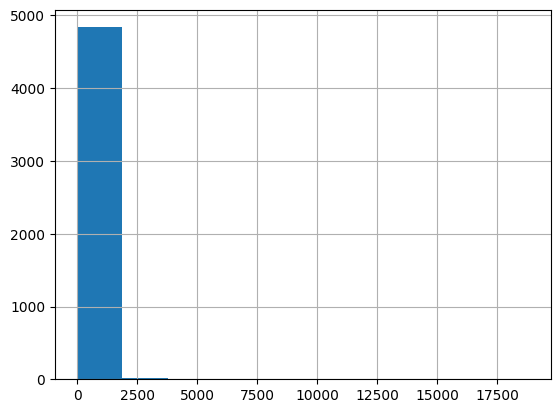

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err_pct'].hist()

<Axes: >

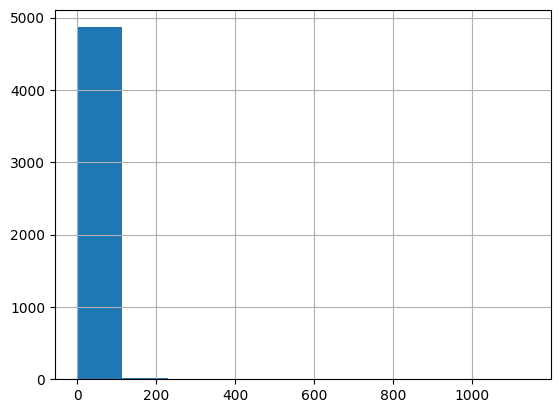

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err_pct'].hist()

<Axes: >

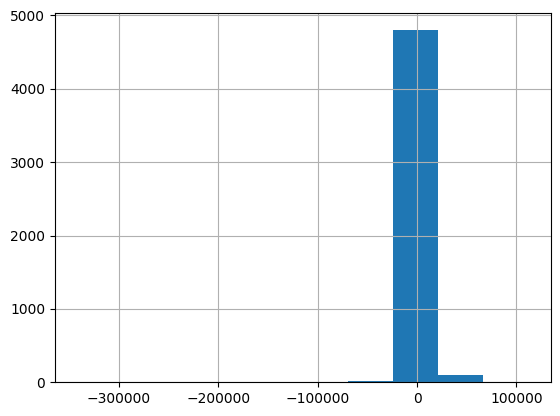

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['distance_err'].hist()

<Axes: >

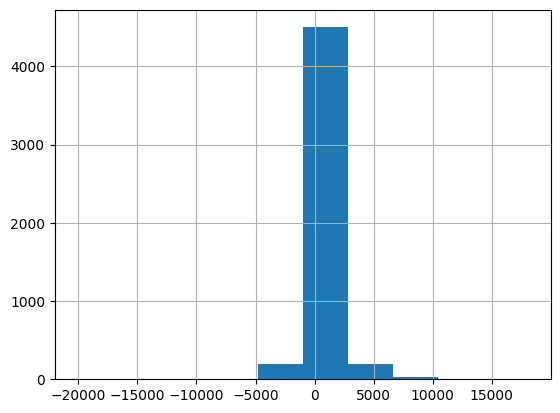

In [ ]:
df.replace([np.inf, -np.inf], np.nan)['duration_err'].hist()

In [ ]:
df['distance_err_bin'] = pd.qcut(df['distance_err'],5)

In [ ]:
df.groupby('distance_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket           upfront_price  \
                                     count      mean         count   
distance_err_bin                                                     
(-341860.001, -754.8]                  985  0.072081           622   
(-754.8, 0.0]                         1007  0.065541           693   
(0.0, 581.4]                           962  0.028067           784   
(581.4, 2466.0]                        984  0.033537           743   
(2466.0, 112012.0]                     985  0.142132           567   

                                   metered_price                
                              mean         count          mean  
distance_err_bin                                                
(-341860.001, -754.8]  9338.362058           985   6481.735442  
(-754.8, 0.0]          2072.340693          1007   5745.271192  
(0.0, 581.4]           1255.807270           962   3210.857422  
(581.4, 2466.0]        2696.943607           984   5552.151494  
(2466.0, 112012.0]     6964.358201           985  18938.390640

In [ ]:
df['duration_err_bin'] = pd.qcut(df['duration_err'],5)

In [ ]:
df.groupby('duration_err_bin')[['overpaid_ride_ticket','upfront_price','metered_price']].agg(['count','mean'])

overpaid_ride_ticket           upfront_price  \
                                    count      mean         count   
duration_err_bin                                                    
(-20081.001, -122.0]                  986  0.070994           729   
(-122.0, 34.0]                        988  0.033401           880   
(34.0, 257.0]                         982  0.027495           787   
(257.0, 845.0]                        983  0.090539           624   
(845.0, 18086.0]                      984  0.119919           389   

                                   metered_price                
                              mean         count          mean  
duration_err_bin                                                
(-20081.001, -122.0]   7674.807545           986   6989.042434  
(-122.0, 34.0]          780.946477           988   1707.660152  
(34.0, 257.0]          1541.834180           982   3134.069287  
(257.0, 845.0]         3527.216026           983   8091.943194  
(845.0, 18086.0]      11530.057841           984  20087.473496

In [ ]:
df

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,...,metered_price_bin,fraud_bin,device_group,dur_bin,distance_err,duration_err,distance_err_pct,duration_err_pct,distance_err_bin,duration_err_bin
0,22,22,2020-02-02 03:37:31,4.04,10.0,2839,700,1,client,finished,...,"(1.999, 4.72]","(-1850.0, -228.0]",xiaomi,"(517.0, 863.0]",-10545.0,-391.0,3.714336,0.558571,"(-341860.001, -754.8]","(-20081.001, -122.0]"
1,618,618,2020-02-08 02:26:19,6.09,3.6,5698,493,1,client,finished,...,"(4.72, 8.25]","(-14225.001, -9999.0]",samsung,"(-0.001, 517.0]",3412.0,133.0,0.598807,0.269777,"(2466.0, 112012.0]","(34.0, 257.0]"
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,...,"(1.999, 4.72]","(-228.0, 49.0]",samsung,"(517.0, 863.0]",325.0,262.0,0.073430,0.376978,"(0.0, 581.4]","(257.0, 845.0]"
3,313,313,2020-02-05 06:34:54,72871.72,NaN,49748,1400,0,client,finished,...,"(13835.1, 194483.52]","(-14225.001, -9999.0]",tecno,"(1304.0, 2241.2]",46731.0,800.0,0.939354,0.571429,"(2466.0, 112012.0]","(257.0, 845.0]"
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,...,"(13835.1, 194483.52]","(-14225.001, -9999.0]",misc,"(2241.2, 22402.0]",-3963.0,2289.0,0.385769,0.451747,"(-341860.001, -754.8]","(845.0, 18086.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4938,3513,3513,2020-03-07 17:42:34,10.89,13.7,15672,1449,1,client,finished,...,"(8.25, 6000.0]","(-1850.0, -228.0]",huawei,"(1304.0, 2241.2]",-500.0,-242.0,0.031904,0.167012,"(-754.8, 0.0]","(-20081.001, -122.0]"
4939,2192,2192,2020-02-22 18:15:45,8789.28,NaN,5712,1173,0,client,finished,...,"(6000.0, 13835.1]","(-14225.001, -9999.0]",samsung,"(863.0, 1304.0]",0.0,80.0,0.000000,0.068201,"(-754.8, 0.0]","(34.0, 257.0]"
4940,4051,4051,2020-03-12 23:08:31,7.50,7.4,5303,486,1,client,finished,...,"(4.72, 8.25]","(-228.0, 49.0]",huawei,"(-0.001, 517.0]",162.0,-12.0,0.030549,0.024691,"(0.0, 581.4]","(-122.0, 34.0]"
4941,3636,3636,2020-03-08 20:15:04,3.06,8.1,3528,338,1,client,finished,...,"(1.999, 4.72]","(-1850.0, -228.0]",misc,"(-0.001, 517.0]",-4615.0,-430.0,1.308107,1.272189,"(-341860.001, -754.8]","(-20081.001, -122.0]"
